In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATAROOT = r'./data/'
wine_data = dict(
    red='winequality-red.csv',
    white='winequality-white.csv'
)
wine_data = dict(
    red=pd.read_csv(
        DATAROOT + wine_data['red'], 
        sep=';'
    ).to_numpy(),
    white=pd.read_csv(
        DATAROOT + wine_data['white'], 
        sep=';'
    ).to_numpy()
)

In [8]:
def PCA(data, n):
    mean = np.average(data, axis=0)
    S = np.sum([
        np.outer(x - mean, x - mean)
        for x in data
    ], axis=0)
    v, w = np.linalg.eig(S)
    reduced_data = np.concatenate([
        np.dot(w[:, 0:n].T, x - mean)[np.newaxis, :]
        for x in data
    ], axis=0)
    return reduced_data

In [28]:
def LDA(data, label, n, c, epsilon=0.001):
    data_sep = [
        data[np.where(label == i)]
        for i in range(c)
    ]
    mean_t = np.average(data, axis=0)
    mean_sep = [
        np.average(data_i, axis=0)
        for data_i in data_sep
    ]
    Sw = list()
    for data_i, mean_i in zip(data_sep, mean_sep):
        for x in data_i:
            Sw.append(np.outer(
                (x - mean_i), 
                (x - mean_i)
            ))
    Sw = np.sum(Sw, axis=0)
    Sb = np.sum([
        len(data_i) * np.outer(
            (mean_i - mean_t), 
            (mean_i - mean_t)
        )
        for data_i, mean_i in zip(data_sep, mean_sep)
    ], axis=0)
    if np.linalg.matrix_rank(Sw) == Sw.shape[0]:
        Sw = Sw + epsilon * np.eye(Sw.shape[0])
    S = np.linalg.inv(Sw) @ Sb
    v, w = np.linalg.eig(S)
    v = v.astype(dtype=np.float32)
    w = w.astype(dtype=np.float32)
    reduced_data = np.concatenate([
        np.dot(w[:, 0:n].T, x - mean_t)[np.newaxis, :]
        for x in data
    ], axis=0)
    return reduced_data

In [43]:
data = dict(
    red=wine_data['red'][:, 0:-1], 
    white=wine_data['white'][:, 0:-1]
)
label = dict(
    red=wine_data['red'][:, -1], 
    white=wine_data['white'][:, -1]
)
label['red'] -= np.min(label['red'])
label['white'] -= np.min(label['white'])
c = dict(
    red=len(set(label['red'])), 
    white=len(set(label['white']))
)

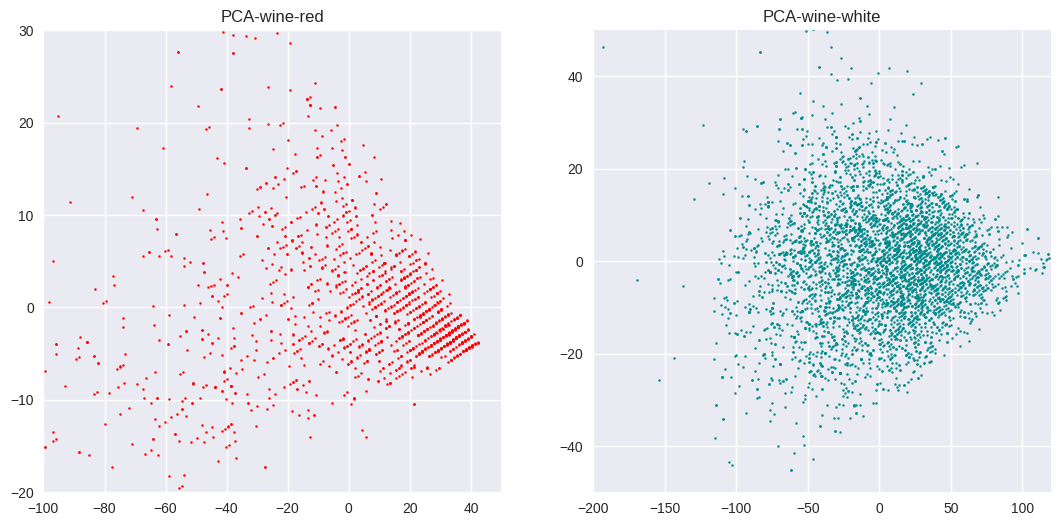

In [40]:
reduced_data = dict(
    red=PCA(data['red'], 2), 
    white=PCA(data['white'], 2)
)
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
axs[0].set_title('PCA-wine-red')
axs[1].set_title('PCA-wine-white')
axs[0].set_xlim(-100, 50)
axs[0].set_ylim(-20, 30)
axs[1].set_xlim(-200, 120)
axs[1].set_ylim(-50, 50)
axs[0].scatter(
    reduced_data['red'][:, 0], 
    reduced_data['red'][:, 1], 
    s=2, c='red'
)
axs[1].scatter(
    reduced_data['white'][:, 0], 
    reduced_data['white'][:, 1], 
    s=2, c='darkcyan'
)
plt.show()

/tmp/ipykernel_4719/3040790390.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  v = v.astype(dtype=np.float32)
/tmp/ipykernel_4719/3040790390.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  w = w.astype(dtype=np.float32)


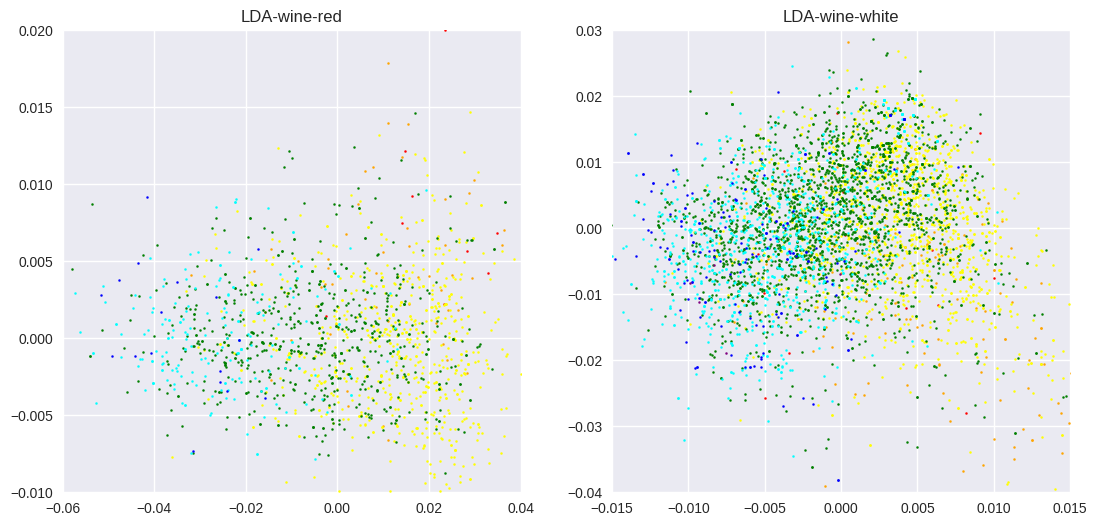

In [50]:
reduced_data = dict(
    red=LDA(
        data['red'], 
        label['red'], 
        2, c['red']
    ), 
    white=LDA(
        data['white'], 
        label['white'], 
        2, c['white']
    )
)
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
axs[0].set_title('LDA-wine-red')
axs[1].set_title('LDA-wine-white')

axs[0].set_xlim(-0.06, 0.04)
axs[0].set_ylim(-0.01, 0.02)
axs[1].set_xlim(-0.015, 0.015)
axs[1].set_ylim(-0.04, 0.03)

color_list = [
    'red',   'orange', 'yellow', 
    'green', 'cyan',   'blue', 'purple'
]
for i, color in zip(range(c['red']), color_list):
    data_i = reduced_data['red'][
        np.where(label['red'] == i)
    ]
    axs[0].scatter(
        data_i[:, 0], 
        data_i[:, 1], 
        s=2, c=color
    )
for i, color in zip(range(c['white']), color_list):
    data_i = reduced_data['white'][
        np.where(label['white'] == i)
    ]
    axs[1].scatter(
        data_i[:, 0], 
        data_i[:, 1], 
        s=2, c=color
    )
plt.show()